In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 加载数据集
iris = load_iris()
X, y = iris.data, iris.target

# 将标签进行One-Hot编码
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# 划分数据集为训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [31]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.softmax(z)

    def compute_loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred))

    def fit(self, X, y,plot=False,ylabel=None):
        acc_list = []
        loss_list = []

        num_features = X.shape[1]
        num_classes = y.shape[1]
        
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))
         

        for epoch in range(self.epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            if plot:
                y_pred_plot = self.predict(X)
                acc = np.mean(np.argmax(y, axis=1) == y_pred_plot)
                acc_list.append(acc)
                loss_list.append(loss)
            
            # 计算梯度
            dw = np.dot(X.T, (y_pred - y)) / X.shape[0]
            db = np.sum(y_pred - y, axis=0, keepdims=True) / X.shape[0]
            
            # 更新权重和偏置
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        if plot:
            plt.plot(acc_list)
            plt.xlabel('Epochs')
            plt.ylabel(ylabel)
            plt.legend(ylabel)

            plt.figure()
            plt.plot(loss_list)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend("Loss")

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)
        


Epoch 0, Loss: 0.3662040962227033
Epoch 100, Loss: 0.11376924290561857
Epoch 200, Loss: 0.0907780706058686
Epoch 300, Loss: 0.07739431538278221
Epoch 400, Loss: 0.06832289502462961
Epoch 500, Loss: 0.06172839918837214
Epoch 600, Loss: 0.056707828126623366
Epoch 700, Loss: 0.052753021376726245
Epoch 800, Loss: 0.0495538569557406
Epoch 900, Loss: 0.04690989942251923
Validation Accuracy: 1.000


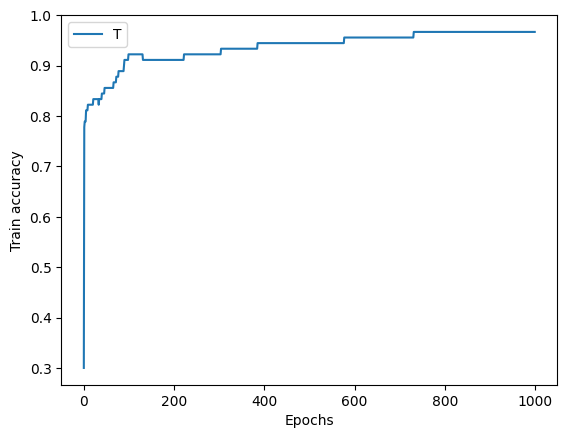

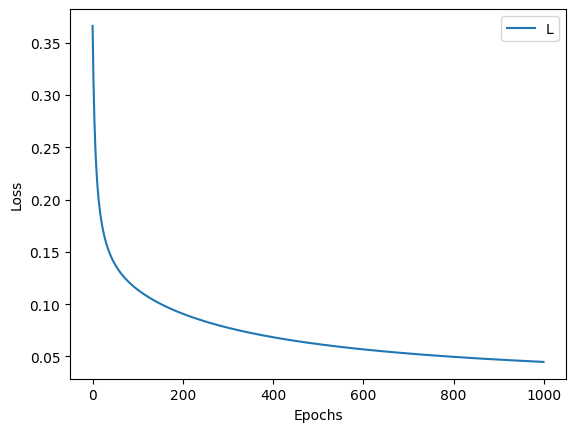

In [32]:
model = SoftmaxRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train,plot=True,ylabel='Train accuracy')

# 验证集上的准确率
y_val_pred = model.predict(X_val)
val_accuracy = np.mean(np.argmax(y_val, axis=1) == y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.3f}')
################################################################

In [43]:
print('某朵鸢尾花的特征表示： ',X_train[1])  # 这里的X_train是做过预处理的，因此特征值存在负数
z = np.dot(X_train[1], model.weights) + model.bias
print('全连接： ',z)
print('max: ',np.max(z,axis=1,keepdims=True))  # axis=1表示按列求最大值，keepdims=True表示保持原来的维度
exp = lambda z:np.exp(z-np.max(z,axis=1,keepdims=True))  # max内函数作用是避免数值溢出，提高softmax算子稳定性
print('exp_z: ',exp(z))
print('softamx: ',SoftmaxRegression.forward(model,X_train[1]))

y_pred = SoftmaxRegression.forward(model, X_train[1])
print('pred:',np.argmax(y_pred, axis=1).item())
print('true:',np.argmax(y_train[1]))
print('pred==true?  :',np.argmax(y_pred, axis=1).item()==np.argmax(y_train[1]))

某朵鸢尾花的特征表示：  [-1.25250202  0.96467035 -1.14444615 -1.39892547]
全连接：  [[ 7.0990097   2.33341767 -9.43242737]]
max:  [[7.0990097]]
exp_z:  [[1.00000000e+00 8.51784392e-03 6.61436418e-08]]
softamx:  [[9.91554032e-01 8.44590248e-03 6.55849948e-08]]
pred: 0
true: 0
pred==true?  : True


In [19]:
z = [[1,2,3],[4,5,6],[7,8,9]]
print(np.max(z,axis=1,keepdims=True))

[[3]
 [6]
 [9]]
